## Calculating Zonal Statistics of Raster Using Python 3

In [1]:
from matplotlib import pyplot as plt
from rasterio.plot import show_hist
from rasterio.plot import show #To plot raster alone
import geopandas as gpd
import pandas as pd
import rasterstats
import rasterio

## Read the Districts shapefile and Rainfall Tifs from Local Disks

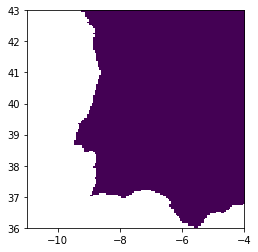

<AxesSubplot:>

In [2]:
# Read the districts shapefile 
districts = gpd.read_file(r'./Districts/districts.shp')

# Read the rainfall raster of 2020-04-15
rf = rasterio.open(r'./Rainfall Data Rasters/2020-4-15.tif', mode = 'r')
rainFall = rasterio.open('Rainfall Data Rasters/2020-4-3.tif', mode='r')
show(rainFall) #This is to plot and show a single Raster as opened above

## Plotting the raster and the districts shapefile together 

In [6]:
"""
Creates a plotting axis and then plots on them
Facecolor(Fill color) = 'None' when ploting .shps to only display bounds
set edge color to sth distinct e.g 'Yellow'
"""
def makePlot():
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,8))
    show(rf, ax = ax1, title = 'Rainfall')
    districts.plot(ax = ax1, facecolor = 'None', edgecolor = 'yellow')
    show_hist(rf, title = 'Histogram', ax = ax2)
    plt.show()
    
    # Assign raster values to a numpy nd array
rainfall_array = rf.read(1)
affine = rf.transform

In [13]:
type(rainfall_array)

numpy.ndarray

### View the Rainfall Metadata

In [14]:
rf.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -9999.0,
 'width': 140,
 'height': 140,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.0500000007451, 0.0, -11.0,
        0.0, -0.0500000007451, 43.0)}

## Calculating the zonal statistics function

In [7]:
"""Calculating the zonal statistics """
def calcZonalStats():
    avg_rf  = rasterstats.zonal_stats(
        districts, rainfall_array, affine = affine,
                                    stats = ['mean'], 
                                    geojson_out = True)

    # Extracting the average rainfall data from the list
    avg_rainfall = []
    i = 0
    while i < len(avg_rf):
        avg_rainfall.append(avg_rf[i]['properties'])
        i = i + 1 

    # Transfering the infromation from the list to a pandas DataFrame
    avg_rf_portugal = pd.DataFrame(avg_rainfall)
    print(avg_rf_portugal)


### Calling The Plot and Calculate Functions

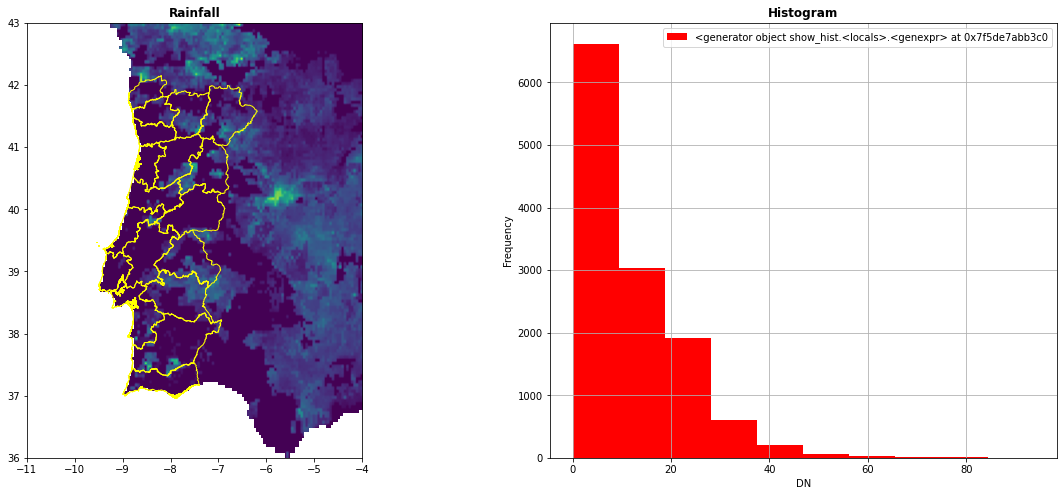

/home/jacob/.local/lib/python3.8/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


              NAME_1       mean
0              Évora  10.884028
1             Aveiro   0.000000
2               Beja   5.332767
3              Braga   4.867859
4           Bragança  11.206017
5     Castelo Branco   1.272397
6            Coimbra   3.267679
7               Faro   2.097385
8             Guarda   9.654525
9             Leiria   2.643043
10            Lisboa   0.581933
11        Portalegre   9.791677
12             Porto   0.000000
13          Santarém   2.660926
14           Setúbal   4.506786
15  Viana do Castelo   7.078903
16         Vila Real   8.453806
17             Viseu   4.682014


In [8]:
makePlot()
calcZonalStats()